In [1]:
import os 
import numpy as np 
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm

HISTORY_PATH = "./history"

In [16]:
def plot_history_line(paths, legends_on=False):
    colors = cm.rainbow(np.linspace(0, 1, len(paths)))
    fig, axes = plt.subplots(2, figsize=(12, 12))

    handles0, labels0 = [], []
    handles1, labels1 = [], []

    for path, color in zip(paths, colors):
        with open(os.path.join(HISTORY_PATH, path), 'r') as f:
            history = json.load(f)

        # Use the color from the colormap for each file
        plot0, = axes[0].plot(range(len(history['loss'])), history['loss'], color=color)
        plot1, = axes[1].plot(range(len(history['iou_score'])), history['iou_score'], color=color)

        if legends_on:
            parts = path.split("_")
            current_num_nests = int(parts[1])
            current_num_filters = int(parts[2])
            current_operation = parts[3]
            legend = f"Operation: {current_operation}, filters: {current_num_filters}, nests: {current_num_nests}"
            handles0.append(plot0)
            labels0.append(legend)
            handles1.append(plot1)
            labels1.append(legend)

    if legends_on:
        axes[0].legend(handles0, labels0, loc='upper left', bbox_to_anchor=(1.05, 1))
        axes[1].legend(handles1, labels1, loc='upper left', bbox_to_anchor=(1.05, 1))

    axes[0].set_title('Loss for All History Files', fontsize=16)
    axes[0].set_xlabel('Epochs', fontsize=14)
    axes[0].set_ylabel('Loss', fontsize=14)

    axes[1].set_title('IoU for All History Files', fontsize=16)
    axes[1].set_xlabel('Epochs', fontsize=14)
    axes[1].set_ylabel('IoU', fontsize=14)

    axes[0].grid(True)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [12]:

def plot_history_scatter(paths, legends_on = False):
    # Create a colormap
    colors = cm.rainbow(np.linspace(0, 1, len(paths)))

    fig, axes = plt.subplots(2, figsize=(12, 12))

    handles0, labels0 = [], []
    handles1, labels1 = [], []

    for path, color in zip(paths, colors):
        with open(os.path.join(HISTORY_PATH, path), 'r') as f:
            history = json.load(f)

        # Use the color from the colormap for each file
        scatter0 = axes[0].scatter(range(len(history['loss'])), history['loss'], color=color)
        scatter1 = axes[1].scatter(range(len(history['iou_score'])), history['iou_score'], color=color)

        if legends_on:
            parts = path.split("_")
            current_num_nests = int(parts[1])
            current_num_filters = int(parts[2])
            current_operation = parts[3]
            legend = f"Operation: {current_operation}, filters: {current_num_filters}, nests: {current_num_nests}"
            handles0.append(scatter0)
            labels0.append(legend)
            handles1.append(scatter1)
            labels1.append(legend)

    if legends_on:
        axes[0].legend(handles0, labels0, loc='upper left', bbox_to_anchor=(1.05, 1))
        axes[1].legend(handles1, labels1, loc='upper left', bbox_to_anchor=(1.05, 1))

    axes[0].set_title('Loss for All History Files', fontsize=16)
    axes[0].set_xlabel('Epochs', fontsize=14)
    axes[0].set_ylabel('Loss', fontsize=14)

    axes[1].set_title('IoU for All History Files', fontsize=16)
    axes[1].set_xlabel('Epochs', fontsize=14)
    axes[1].set_ylabel('IoU', fontsize=14)

    axes[0].grid(True)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [4]:

paths = [path for path in os.listdir(HISTORY_PATH)]
kvasir_paths = [path for path in paths if "_kvasir" in path]
bagls_paths = [path for path in paths if "_kvasir" not in path]

def filter_paths(paths, num_nests, num_filters, operation):
    filtered_paths = [path for path in paths if f"history_{num_nests}_{num_filters}_{operation}" in path]
    return filtered_paths

def paths_fixed_nests(paths, num_nests):
    filtered_paths = [path for path in paths if f"history_{num_nests}" in path]
    return filtered_paths

def paths_fixed_operation(paths, operation):
    filtered_paths = [path for path in paths if f"_{operation}" in path]
    return filtered_paths

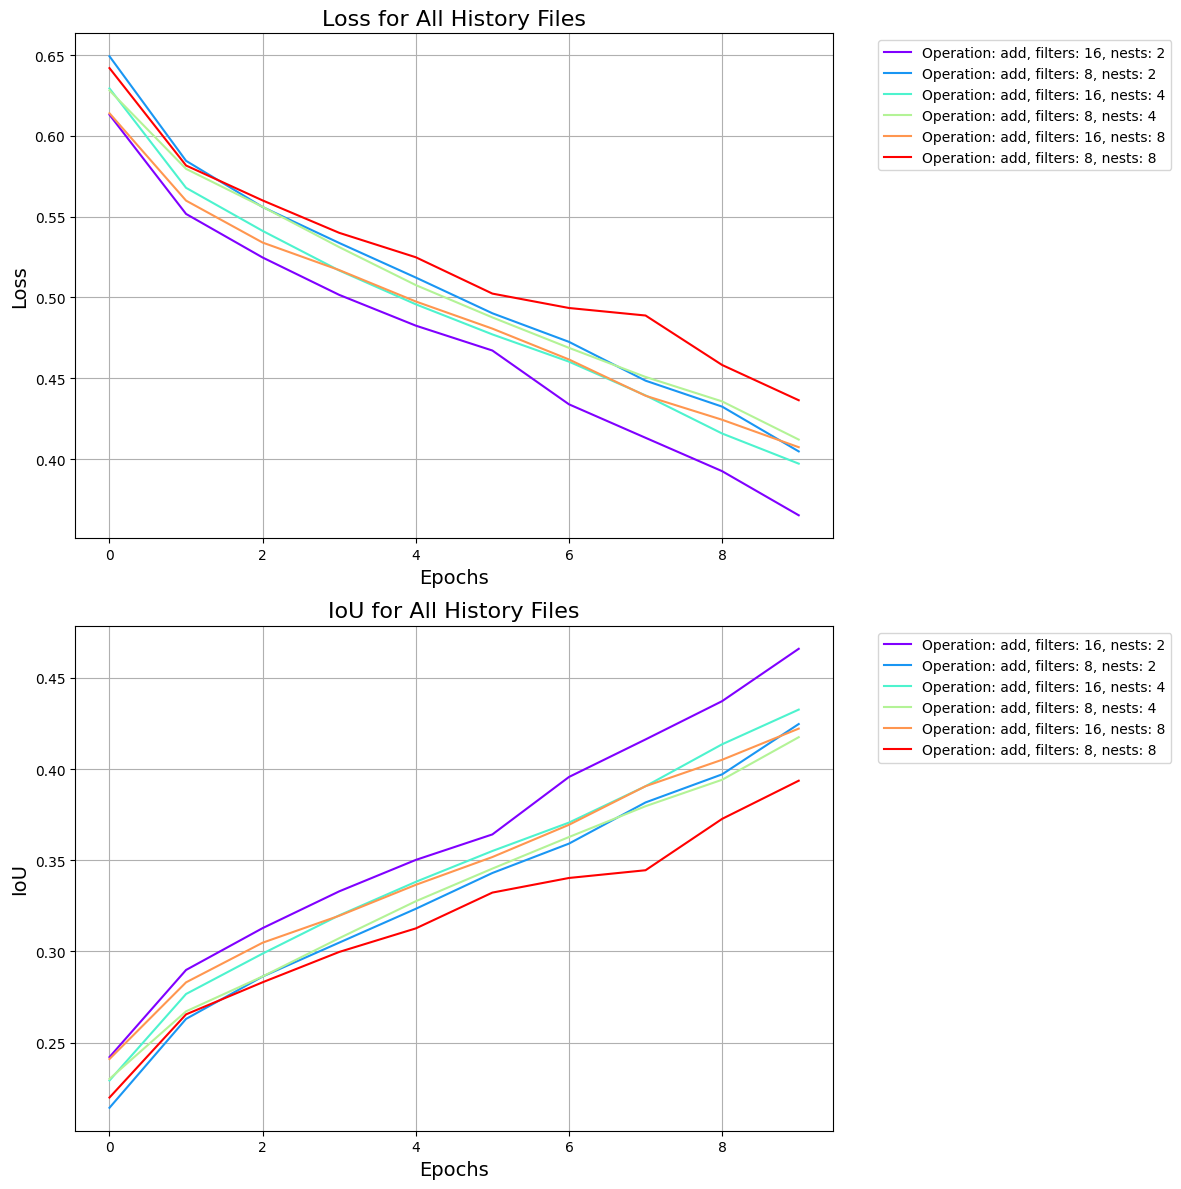

In [17]:
operation = "add"
fixed_operation = paths_fixed_operation(kvasir_paths, operation)
plot_history_line(fixed_operation, legends_on=True)

Using [nutils](https://github.com/anki-xyz/nutil/blob/master/nutil/plot.py)

In [ ]:
from nutils.plot import paperStyle